# Worksheet 21

Name:  Aoife Kenny
UID: U68390518

### Topics

- Logistic Regression

## Logistic Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    centers_float = np.array(centers, dtype=float) #need centers to be of type float bc filter func cannot work on an int in this case
    X = np.array(list(filter(lambda x : (x[0] - centers_float[0][0])**2 + (x[1] - centers_float[0][1])**2 < 1 or (x[0] - centers_float[0][0])**2 + (x[1] - centers_float[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers_float[0][0])**2 + (x[1] - centers_float[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

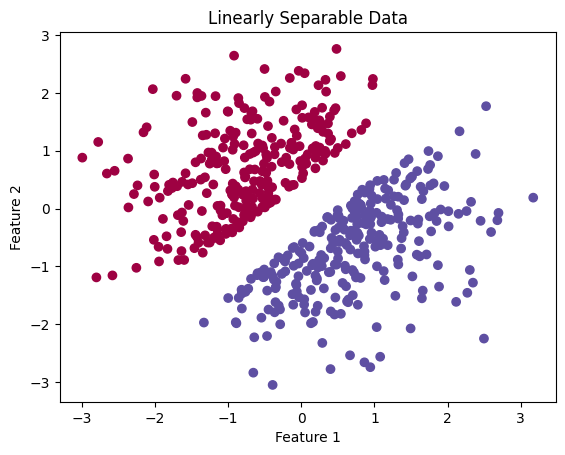

In [29]:
X,Y = generate_line_data()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [30]:
model = LogisticRegression().fit(X, Y)
coef = model.coef_
int = model.intercept_
print("coefficients = ", coef)
print("interecept = ", int)

coefficients =  [[ 4.11337993 -4.10105513]]
interecept =  [0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

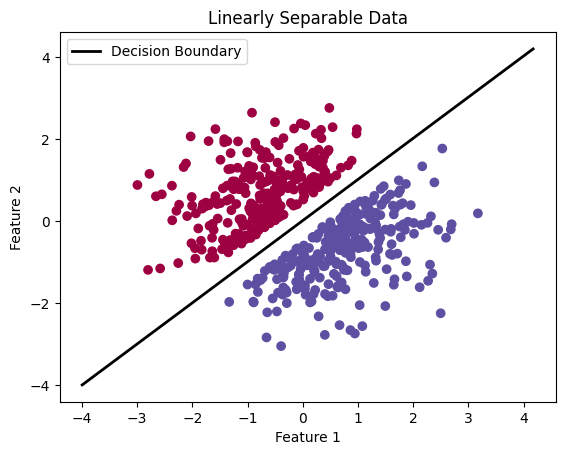

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(model.coef_[0][0] * xx + model.intercept_) / model.coef_[0][1]
plt.plot(xx, yy, color='k', linestyle='-', linewidth=2, label='Decision Boundary')
plt.legend()
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

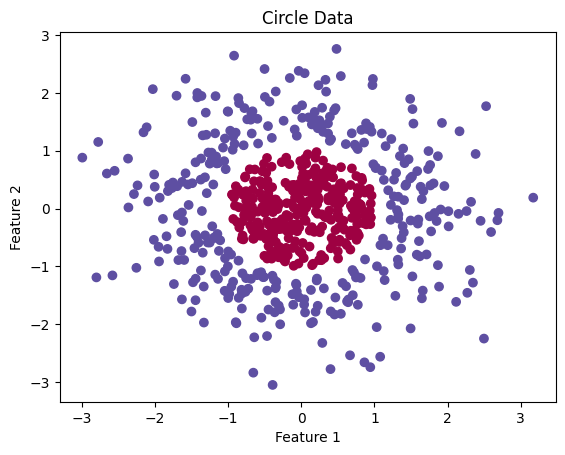

In [44]:
X,Y2 = generate_circle_data(t)
plt.scatter(X[:, 0], X[:, 1], c=Y2, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circle Data')
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

coefficients =  [[ 8.21299722 -0.05754235]]
interecept =  [-9.25755534]


"x_min, x_max = 0, points[:,0].max() + 0.5\ny_min, y_max = points[:,1].min(), points[:,1].max()\nxx = np.linspace(x_min, x_max)\nyy = -(model.coef_[0][0] * xx + model.intercept_) / model.coef_[0][1]\nplt.plot(xx, yy, color='k', linestyle='-', linewidth=2, label='Decision Boundary')\nplt.legend()\nplt.ylim(y_min, y_max)\nplt.xlim(x_min, x_max)\nplt.show()"

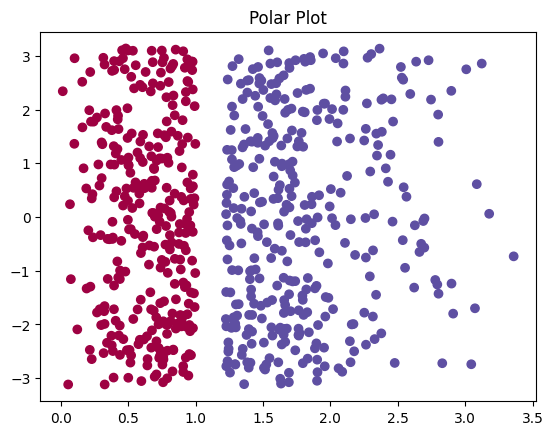

In [58]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta
points = []
for x,y in X:
    r, theta = cartesian_to_polar(x,y)
    points.append([r,theta]) #use append instead of +[] so it adds as one element to the list
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c=Y2, cmap=plt.cm.Spectral)
#plt.polar(theta_list, r_list)
plt.title('Polar Plot')
#plt.show()
#points = np.array(points)
model = LogisticRegression().fit(points, Y2)
coef = model.coef_
int = model.intercept_
print("coefficients = ", coef)
print("interecept = ", int)
"""x_min, x_max = 0, points[:,0].max() + 0.5
y_min, y_max = points[:,1].min(), points[:,1].max()
xx = np.linspace(x_min, x_max)
yy = -(model.coef_[0][0] * xx + model.intercept_) / model.coef_[0][1]
plt.plot(xx, yy, color='k', linestyle='-', linewidth=2, label='Decision Boundary')
plt.legend()
plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)
plt.show()"""

f) Plot the decision boundary using the code below.

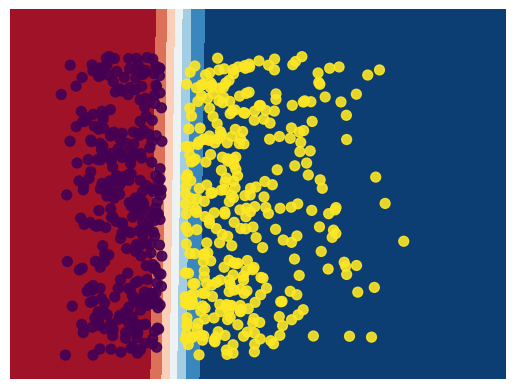

In [59]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = points[:, 0].min() - .5, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - .5, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(points[:, 0], points[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

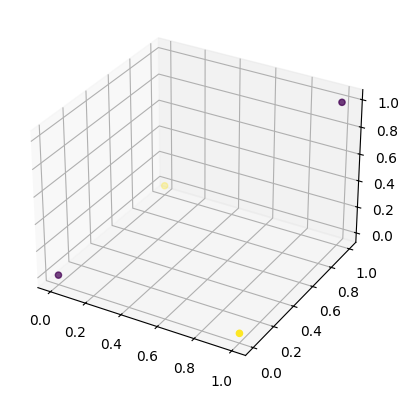

In [60]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

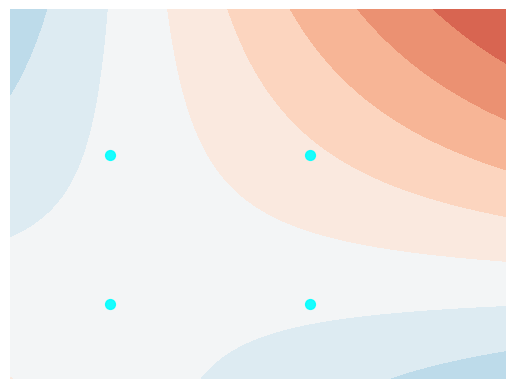

In [61]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


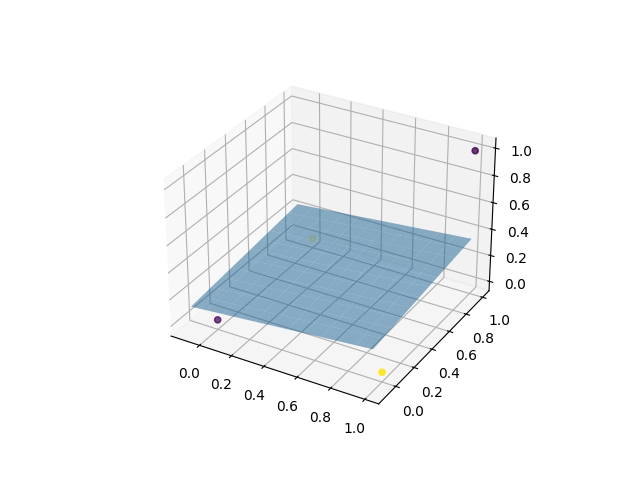

In [63]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel()]


Z = model.predict(mesh_data)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)


plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

plt.title('Concentric Circles Data and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
print('j')

kernel stopped working when i did the last question hence why the plot isnt showing*